# Metropolis hastings

Simple sampling method, using 3 steps:

- We define the distribution to sample from as $P(x)$ where $x$ is location to sample from.
- At first we set $x_0$ to a random value.

Iterate this for each sample:

- Take a step from previous $x$ $x_t = x_{t-1} + randomNorm$
- If $min(1, P(x_t)/P(x_{t-1})) > unif[0,1]$:
  - Accept sample and save it to sampled points.
- else 
  - $x_t = x_{t-1}$

In [1]:
import math
def normal_dist(x, sig=1.5, mu=10):
    return (1/math.sqrt(2*math.pi*sig**2)) * math.exp(-(x - mu)**2/(2*sig**2))
def mixed_normal(x):
    return normal_dist(x, sig=0.8, mu=6) * 0.2 + normal_dist(x) * 0.8

In [7]:
#Sampling methods
import numpy as np

def metropolis_hastings(dist, length=250):
    x = np.random.normal(size=1)
    samples = []

    for i in range(length):
        x_n = x + np.random.normal(size=1)
        if (dist(x_n)/dist(x)) > np.random.uniform(0,1,1):
            samples.append(x_n)
            x = x_n

    return samples

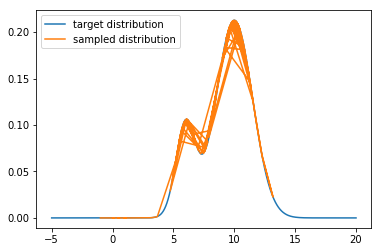

In [12]:
import matplotlib.pyplot as plt

r = (-5, 20)
plt.plot(np.linspace(r[0], r[1], 1000), [mixed_normal(s) for s in np.linspace(r[0], r[1], 1000)], label='target distribution')
samples = metropolis_hastings(mixed_normal, length=150)
plt.plot(samples, [mixed_normal(s) for s in samples], label='sampled distribution')
plt.legend()
plt.show()

Here we can se a properly estimated normal distribution using the metropolis-hastings sampling method.